**COMPANY DATASET**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
!pip install category_encoders
import category_encoders as ce

In [ ]:
# Import dataset
from google.colab import files
uploaded=files.upload()

Saving Company_Data.csv to Company_Data.csv


In [ ]:
company=pd.read_csv('Company_Data.csv')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [ ]:
company.shape

(400, 11)

In [ ]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [ ]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

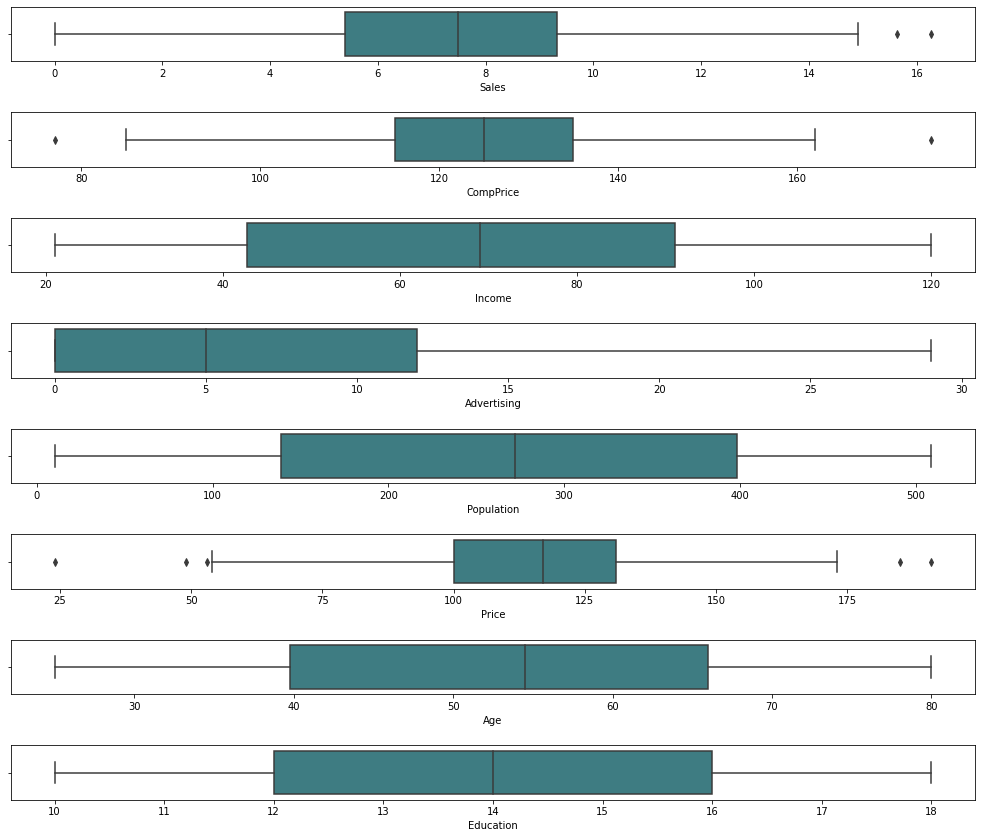

In [ ]:
ot=company.copy() 
fig, axes=plt.subplots(8,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='Sales',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='CompPrice',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Income',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Advertising',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Population',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Price',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Age',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Education',data=ot,palette='crest',ax=axes[7])
plt.tight_layout(pad=2.0)

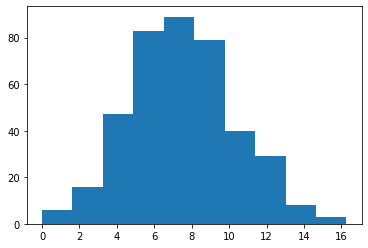

In [ ]:
plt.hist('Sales',data=company)
plt.show()

In [ ]:
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['ShelveLoc', 'Urban', 'US'])
company1 = encoder.fit_transform(company)

In [ ]:
company_val = []
for value in company["Sales"]:
     if value<=7.5:
        company_val.append("Low")
     else:
        company_val.append("High")

company1["company_val"]= company_val

In [ ]:
company1.head(10)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,company_val
0,9.50,138,73,11,276,120,1,42,17,1,1,High
1,11.22,111,48,16,260,83,2,65,10,1,1,High
2,10.06,113,35,10,269,80,3,59,12,1,1,High
3,7.40,117,100,4,466,97,3,55,14,1,1,Low
4,4.15,141,64,3,340,128,1,38,13,1,2,Low
5,10.81,124,113,13,501,72,1,78,16,2,1,High
6,6.63,115,105,0,45,108,3,71,15,1,2,Low
7,11.85,136,81,15,425,120,2,67,10,1,1,High
8,6.54,132,110,0,108,124,3,76,10,2,2,Low
9,4.69,132,113,0,131,124,3,76,17,2,1,Low


In [ ]:
# Shevloc => 1-Bad, 2-Good, 3-Medium
# Urban => 1-Yes, 2-No
# US => 1-Yes, 2-No

In [ ]:
x = company1.drop(['company_val','Sales'], axis =1)
y = company1['company_val']


In [ ]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,1,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,3,59,12,1,1
3,117,100,4,466,97,3,55,14,1,1
4,141,64,3,340,128,1,38,13,1,2
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,3,55,11,2,1
397,162,26,12,368,159,3,40,18,1,1
398,100,79,7,284,95,1,50,12,1,1


In [ ]:
y

0      High
1      High
2      High
3       Low
4       Low
       ... 
395    High
396     Low
397     Low
398     Low
399    High
Name: company_val, Length: 400, dtype: object

In [ ]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

**Building Decision Tree Classifier using Entropy Criteria**

In [ ]:
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
#Predicting on test data
pred_test1 = model1.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test1==y_test)*100)
#Predicting on train data
pred_train1 = model1.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train1==y_train)*100)

Test data Accuracy is: 67.5
Train data Accuracy is: 80.3125


In [ ]:
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=6)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [ ]:
#Predicting on test data
pred_test2 = model2.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test2==y_test)*100)
#Predicting on train data
pred_train2 = model2.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train2==y_train)*100)

Test data Accuracy is: 68.75
Train data Accuracy is: 92.5


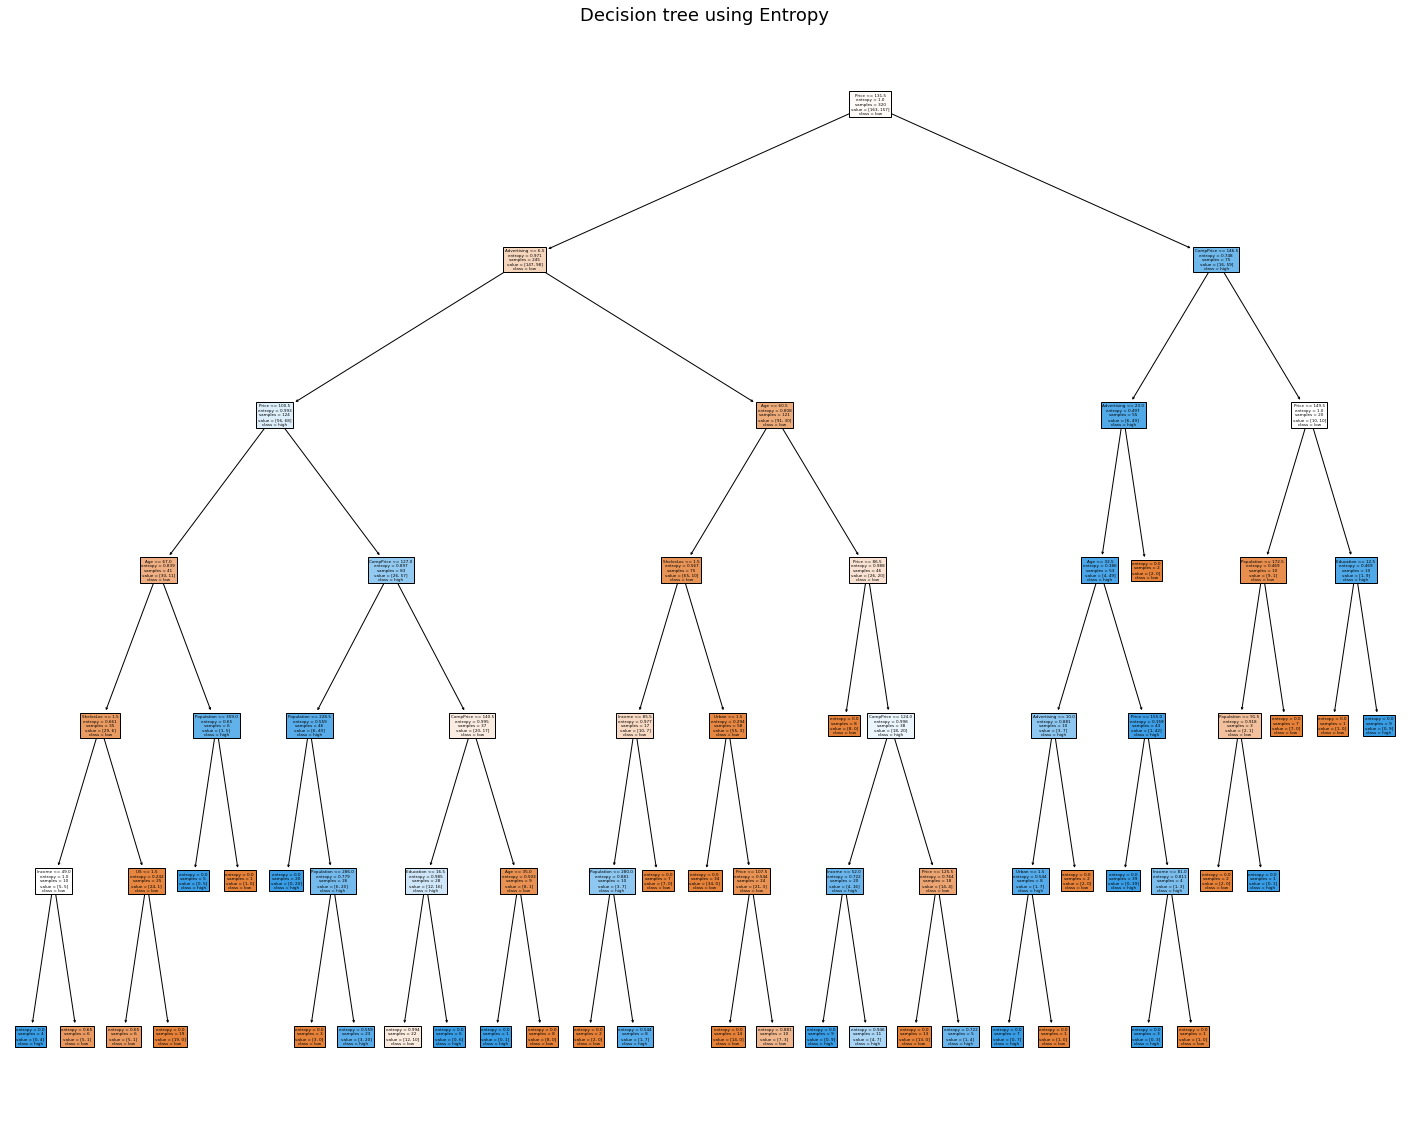

In [ ]:
#PLot the decision tree
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model2,
 feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education',
 'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Entropy',fontsize=18);

In [ ]:
#predicting on test data
pred=model2.predict(x_test)
pd.Series(pred).value_counts()

High    42
Low     38
dtype: int64

In [ ]:
y_test.value_counts()

Low     45
High    35
Name: company_val, dtype: int64

In [ ]:
pred

array(['Low', 'Low', 'High', 'High', 'Low', 'High', 'High', 'High',
       'High', 'High', 'Low', 'Low', 'Low', 'High', 'High', 'Low', 'High',
       'High', 'Low', 'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low',
       'High', 'High', 'High', 'High', 'High', 'Low', 'High', 'High',
       'High', 'High', 'Low', 'High', 'High', 'High', 'Low', 'Low', 'Low',
       'High', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'Low', 'High',
       'High', 'High', 'High', 'High', 'Low', 'High', 'Low', 'Low', 'Low',
       'Low', 'High', 'High', 'Low', 'High', 'Low', 'Low', 'High', 'High',
       'Low', 'Low', 'Low', 'Low', 'High', 'High', 'Low', 'Low', 'Low',
       'Low'], dtype=object)

In [ ]:
pd.crosstab(y_test,pred)

col_0,High,Low
company_val,,
High,26,9
Low,16,29


In [ ]:
# Accuracy 
from sklearn.metrics import accuracy_score

accuracy_score(y_test,pred)

0.6875

In [ ]:
np.mean(pred==y_test)*100

68.75


**Building Decision Tree Classifier (CART) using Gini Criteria**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini1 = DecisionTreeClassifier(criterion='gini', max_depth=6)
model_gini1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [ ]:
#Predicting on test data
pred_testg1 = model_gini1.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_testg1==y_test)*100)
#Predicting on train data
pred_traing1 = model_gini1.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing1==y_train)*100)

Test data Accuracy is: 66.25
Train data Accuracy is: 92.1875


Text(0.5, 1.0, 'Decision tree using Gini')

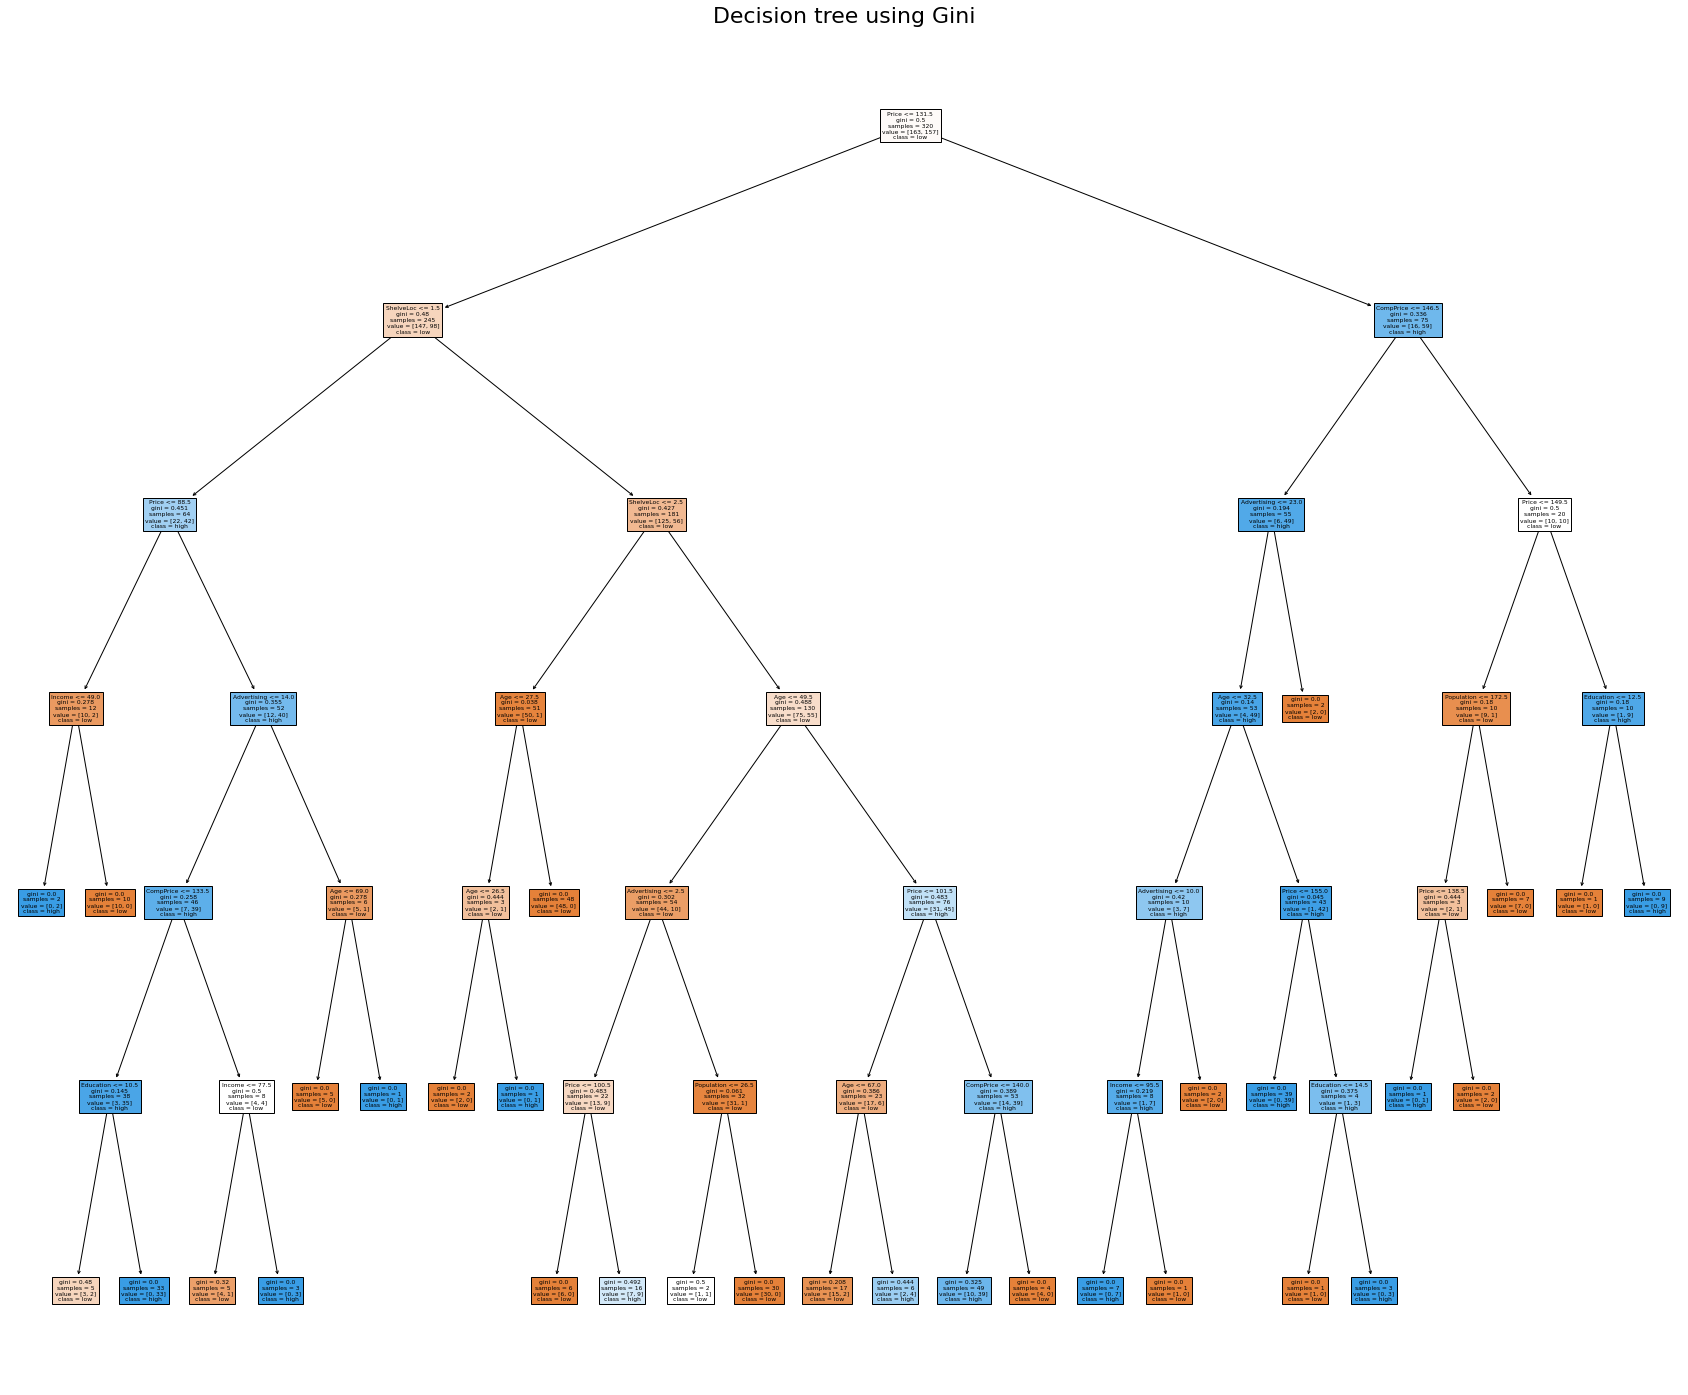

In [ ]:
# plot the decision tree
fig = plt.figure(figsize=(30,25))
fig = tree.plot_tree(model_gini1,
 feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education',
 'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Gini',fontsize=22)

In [ ]:
preds = model_gini1.predict(x_test)
pd.Series(preds).value_counts()

Low     42
High    38
dtype: int64

In [ ]:
preds

array(['Low', 'Low', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'High',
       'High', 'Low', 'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low',
       'High', 'High', 'Low', 'High', 'High', 'Low', 'High', 'High',
       'High', 'High', 'Low', 'High', 'High', 'Low', 'Low', 'Low', 'High',
       'High', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'High', 'High', 'High', 'High', 'Low', 'High', 'Low', 'Low', 'Low',
       'Low', 'High', 'Low', 'Low', 'High', 'High', 'Low', 'High', 'High',
       'High', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low'], dtype=object)

In [ ]:
pd.crosstab(y_test,preds)

col_0,High,Low
company_val,,
High,23,12
Low,15,30


In [ ]:
# Accuracy 
from sklearn.metrics import accuracy_score

accuracy_score(y_test,preds)

0.6625

In [ ]:
np.mean(preds==y_test)*100

66.25

Features importance

In [ ]:
column=company1.columns

In [ ]:
column=column.drop(['company_val','Sales'])

In [ ]:
feature=model2.feature_importances_

In [ ]:
df1=pd.DataFrame({"column":column,"importance":feature})
df1.sort_values("importance",ascending=False)

,column,importance
4,Price,0.305264
0,CompPrice,0.140274
2,Advertising,0.131218
3,Population,0.105476
6,Age,0.098944
1,Income,0.089070
5,ShelveLoc,0.063603
7,Education,0.041593
8,Urban,0.015936
9,US,0.008621


// Price have high importance //

**FRAUD_CHECK DATASET**

In [ ]:
# Import dataset
from google.colab import files
uploaded=files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [ ]:
fraud=pd.read_csv('Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [ ]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

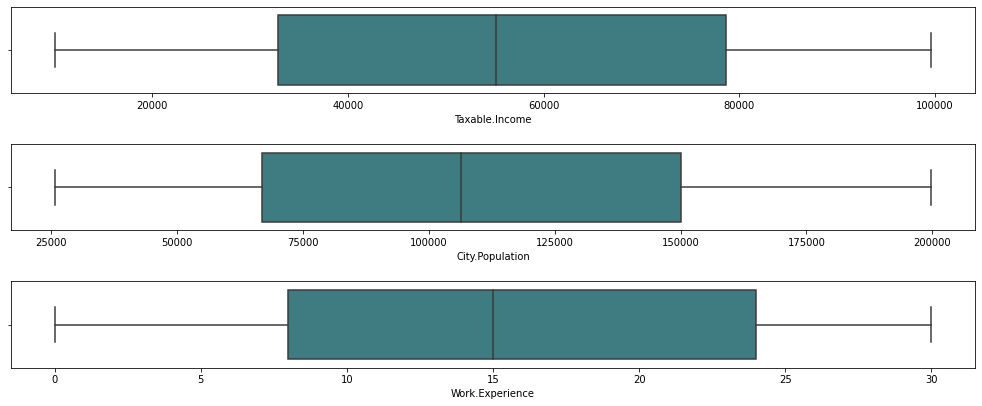

In [ ]:
import seaborn as sns
ot=fraud.copy() 
fig, axes=plt.subplots(3,1,figsize=(14,6),sharex=False,sharey=False)
sns.boxplot(x='Taxable.Income',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='City.Population',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Work.Experience',data=ot,palette='crest',ax=axes[2])
plt.tight_layout(pad=2.0)

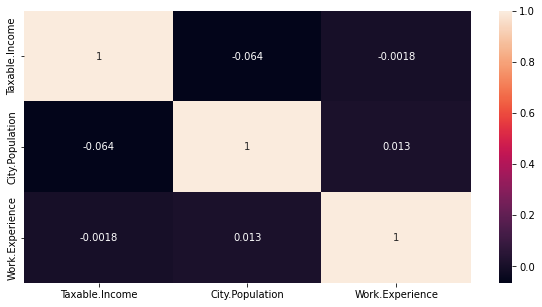

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(fraud.corr(),annot=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
fraud['Undergrad'] = label_encoder.fit_transform(fraud['Undergrad'])
fraud['Marital.Status'] = label_encoder.fit_transform(fraud['Marital.Status'])
fraud['Urban'] = label_encoder.fit_transform(fraud['Urban'])
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital.Status   600 non-null    int64
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int64
dtypes: int64(6)
memory usage: 28.2 KB


In [ ]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [ ]:
# Undergrad => 0-No, 1-Yes
# Marital.Status => 0-Divorced, 1-Married, 2-Single
# Urban => 0-No, 1-Yes

In [ ]:
#Categorial Data Based on Taxable income
tax_value=[]
for i in fraud['Taxable.Income']:
  if i<=30000:
    tax_value.append("risky")
  else:
    tax_value.append("Good")  
fraud['tax_value']=tax_value

In [ ]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_value
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [ ]:
label_encoder = LabelEncoder()
fraud['tax_value'] = label_encoder.fit_transform(fraud['tax_value'])

In [ ]:
fraud1=fraud.drop(['Taxable.Income'],axis=1)
fraud1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_value
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [ ]:
x=fraud1.iloc[:,0:5]  #Independent variable
y=fraud1['tax_value'] #dependent variable

In [ ]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: tax_value, Length: 600, dtype: int64

In [ ]:
#count of each class
fraud1.tax_value.value_counts()       # 0-Good, 1-Bad

0    476
1    124
Name: tax_value, dtype: int64

In [ ]:
#Splitting data into training and test data set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state=40)

**Decision Tree Classifier C5.0 using Entropy Criteria**

In [ ]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
#Predicting on test data
pred_test = model.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test==y_test)*100)
#Predicting on train data
pred_train = model.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train==y_train)*100)

Test data Accuracy is: 77.22222222222223
Train data Accuracy is: 80.47619047619048


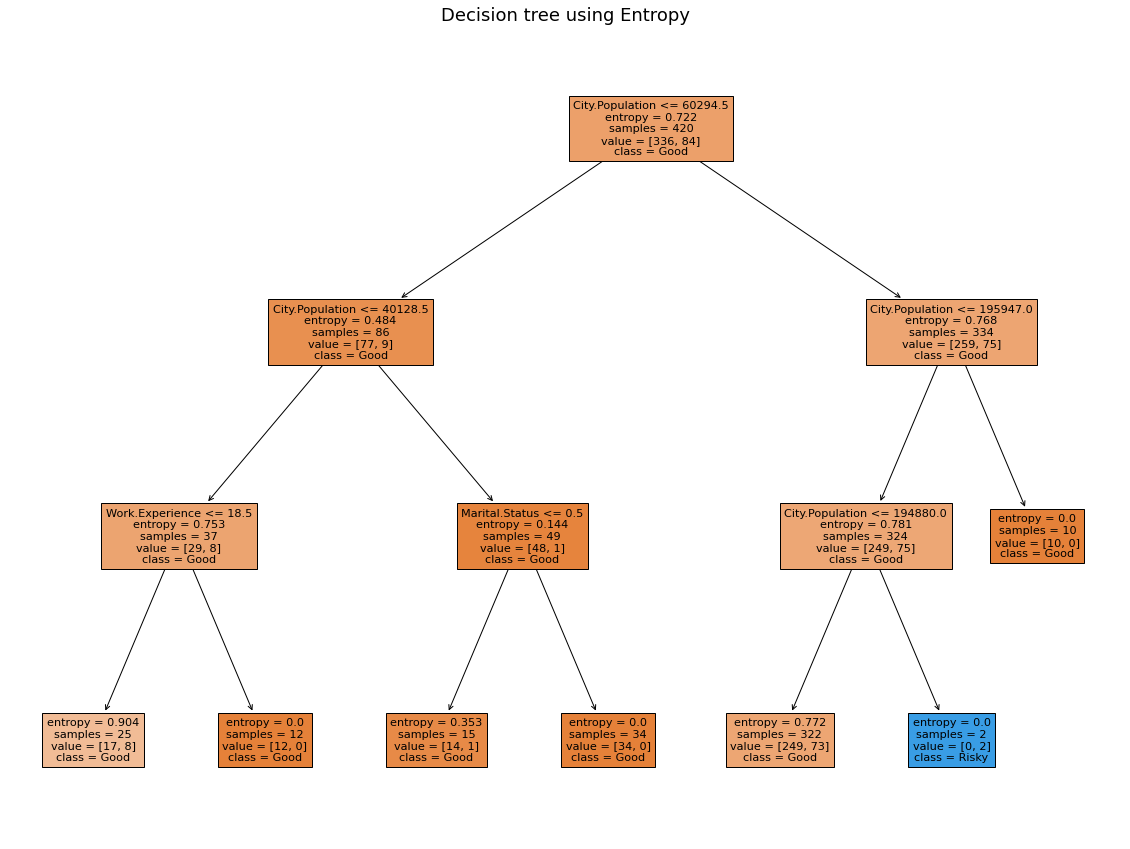

In [ ]:
#Plotting decision tree
fig=plt.figure(figsize=(20,15))
tree.plot_tree(model,feature_names=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban'],class_names=['Good','Risky'],filled=True);
plt.title('Decision tree using Entropy',fontsize=18);

In [ ]:
#predicting on test data
pred=model.predict(x_test)
pd.Series(pred).value_counts()

0    179
1      1
dtype: int64

In [ ]:
pd.crosstab(y_test,pred)

col_0,0,1
tax_value,,
0,139,1
1,40,0


In [ ]:
#calculating accuracy
np.mean(pred==y_test)*100

77.22222222222223

77.22% Accuracy

**Building Decision Tree Classifier using Gini Creteria**

In [ ]:
model1=DecisionTreeClassifier(criterion='gini',max_depth=3)
model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

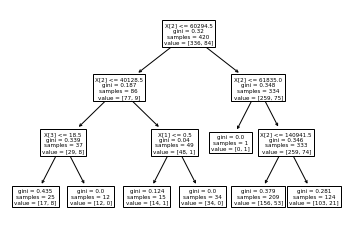

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#Plot the Decision tree
tree.plot_tree(model1);

<Figure size 1440x1080 with 0 Axes>

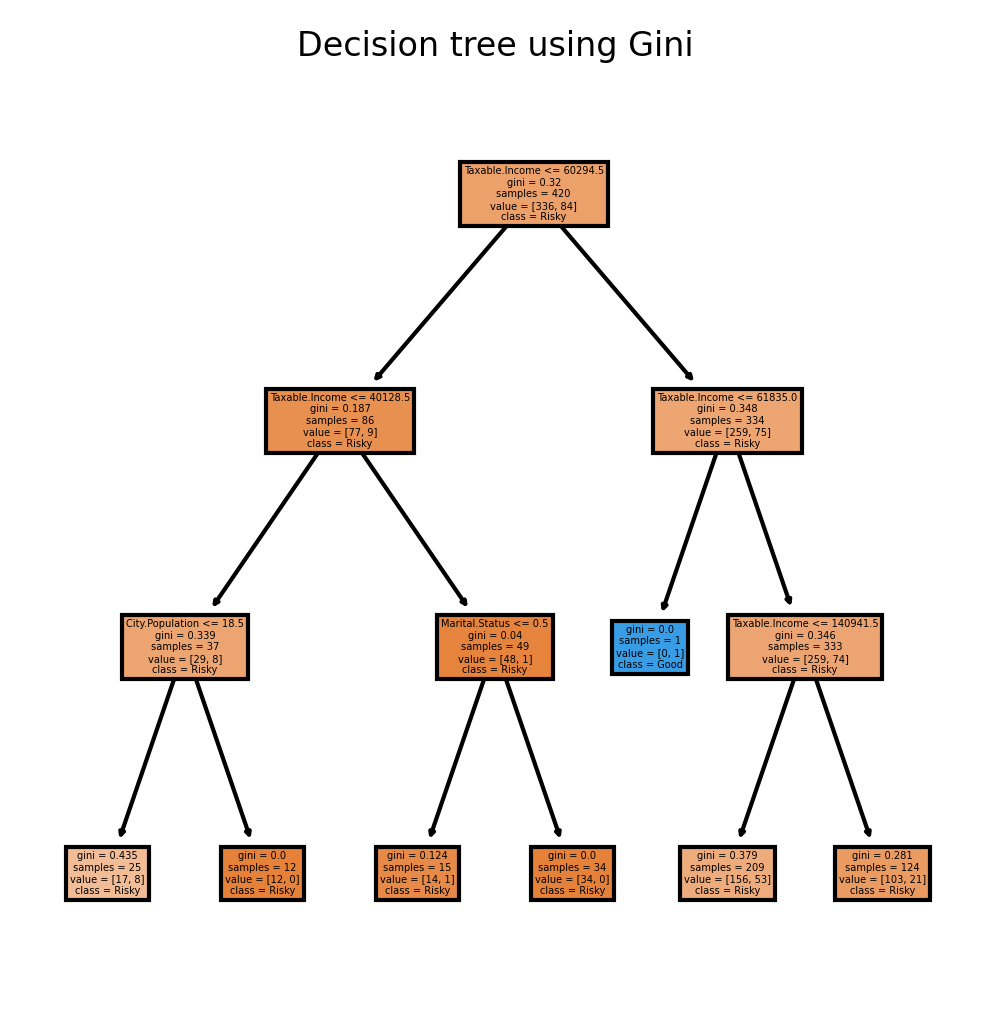

In [ ]:
figure=plt.figure(figsize=(20,15))
fn = ['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population', 'Work.Experiance', 'Urban']
cn = ['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300);
tree.plot_tree(model1,
               feature_names = fn, 
               class_names=cn,
               filled = True);
plt.title('Decision tree using Gini',fontsize=8);

In [ ]:
#Predicting Values on Test Data
pred_gini=model1.predict(x_test)
pd.Series(pred_gini).value_counts()

0    180
dtype: int64

In [ ]:
pd.crosstab(pred_gini,y_test)

tax_value,0,1
row_0,,
0,140,40


In [ ]:
#calculating Accuracy
np.mean(pred_gini==y_test)*100

77.77777777777779

77.77% Accuracy